In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [ ]:
df.shape

(32581, 12)

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [ ]:
df.isnull().sum()/len(df)

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,0.027470
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,0.095639
loan_status,0.000000
loan_percent_income,0.000000


In [ ]:
print("The missing columns are person_emp_length and loan_int_rate")

The missing columns are person_emp_length and loan_int_rate


<Axes: >

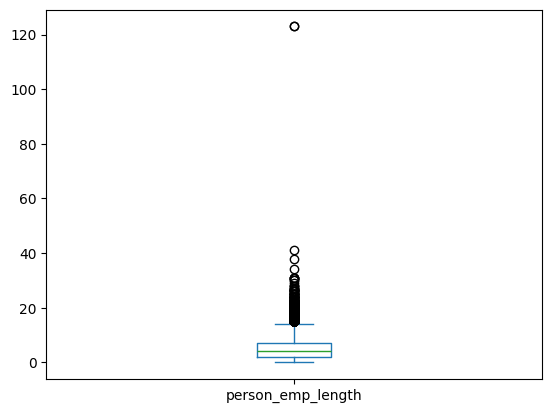

In [ ]:
df["person_emp_length"].plot(kind="box")

In [ ]:
a=df["person_emp_length"].median()
df["person_emp_length"].fillna(a,inplace=True)

<Axes: >

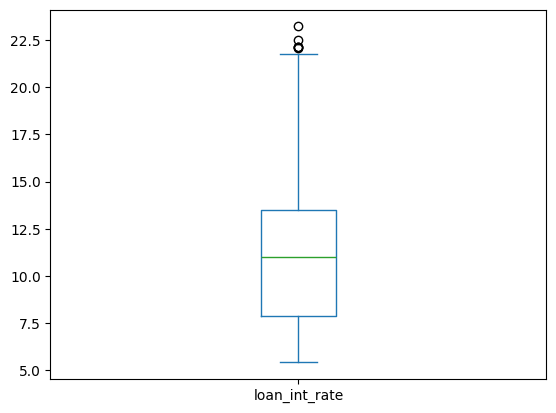

In [ ]:
df["loan_int_rate"].plot(kind="box")

In [ ]:
b=df["loan_int_rate"].median()
df["loan_int_rate"].fillna(b,inplace=True)

In [ ]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


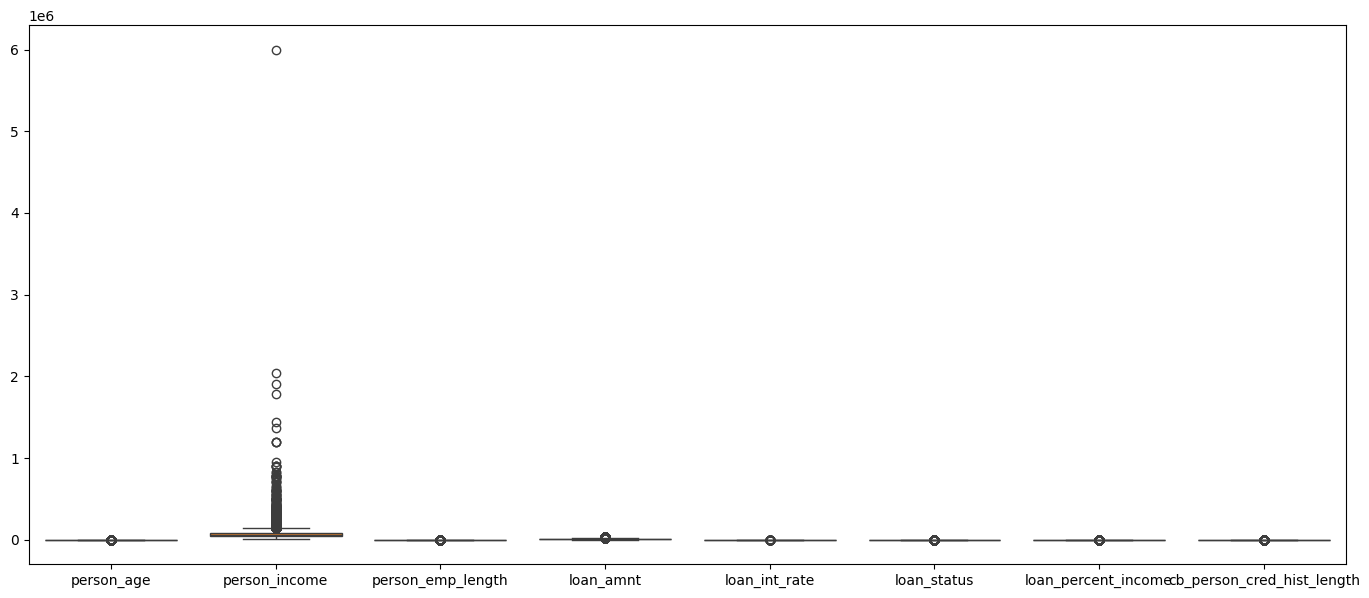

In [ ]:
plt.figure(figsize=(17, 7))
sns.boxplot(data=df)
plt.show()

In [ ]:
q1=df["person_income"].quantile(0.25)
q1

38500.0

In [ ]:
q3=df["person_income"].quantile(0.75)
q3

79200.0

In [ ]:
IQR=q3-q1
IQR

40700.0

In [ ]:
lower_boundary=q1-1.5*IQR
lower_boundary

-22550.0

In [ ]:
upper_boundary=q3+1.5*IQR
upper_boundary

140250.0

In [ ]:
df1=df[(df["person_income"]>lower_boundary)&(df["person_income"]<upper_boundary)]
df1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08,N,20
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


<Axes: >

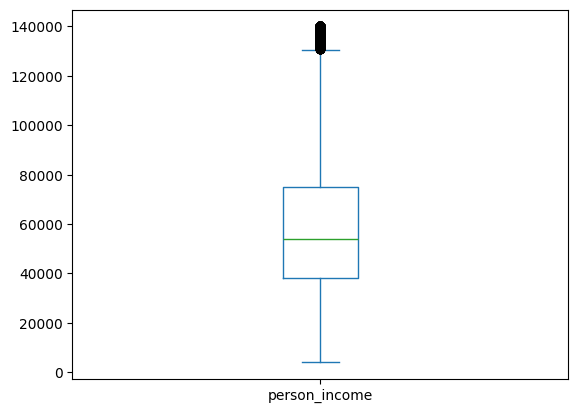

In [ ]:
df1["person_income"].plot(kind="box")

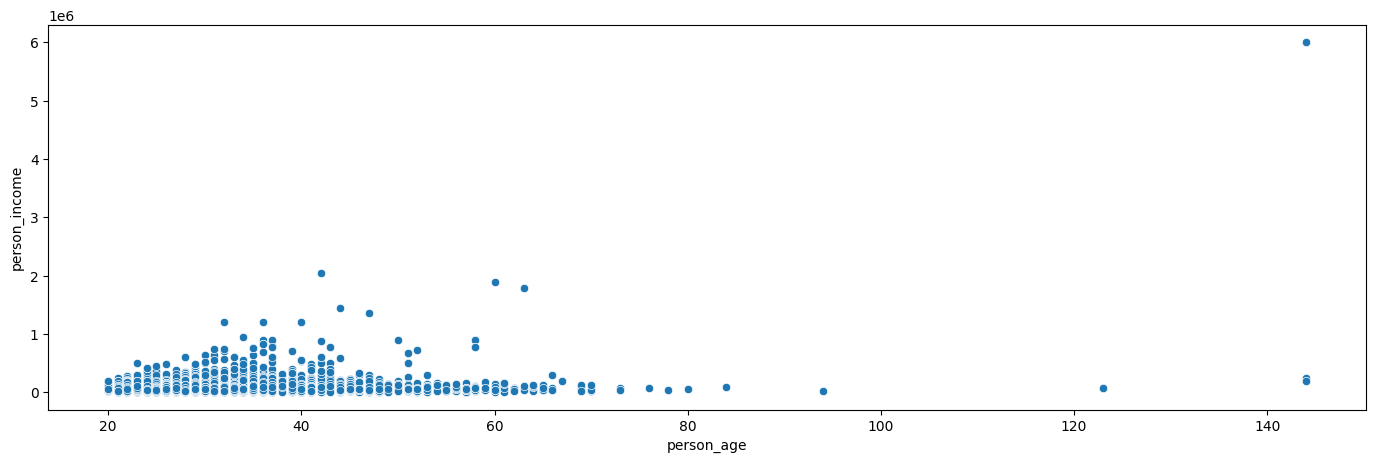

In [ ]:
plt.figure(figsize=(17, 5))
sns.scatterplot(data=df,y="person_income",x="person_age")
plt.show()

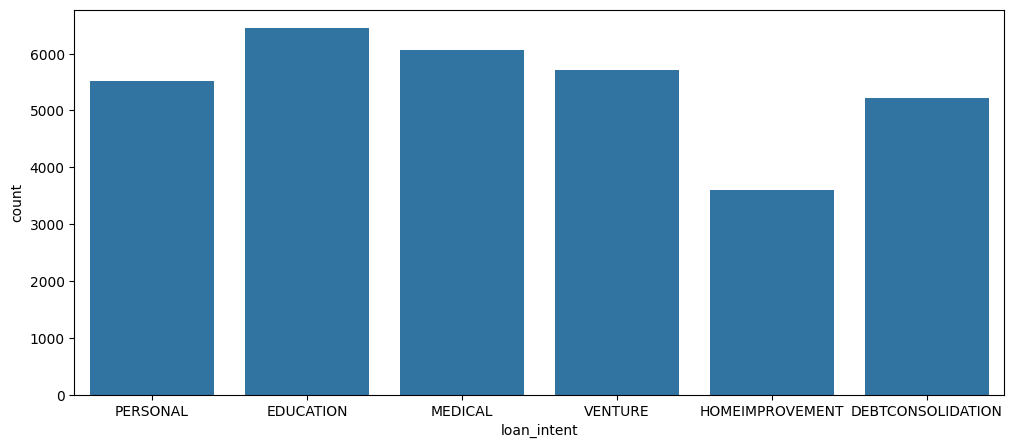

In [ ]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df,x="loan_intent")
plt.show()

From the above graph we can see that the more loan has been taken for the education and medical

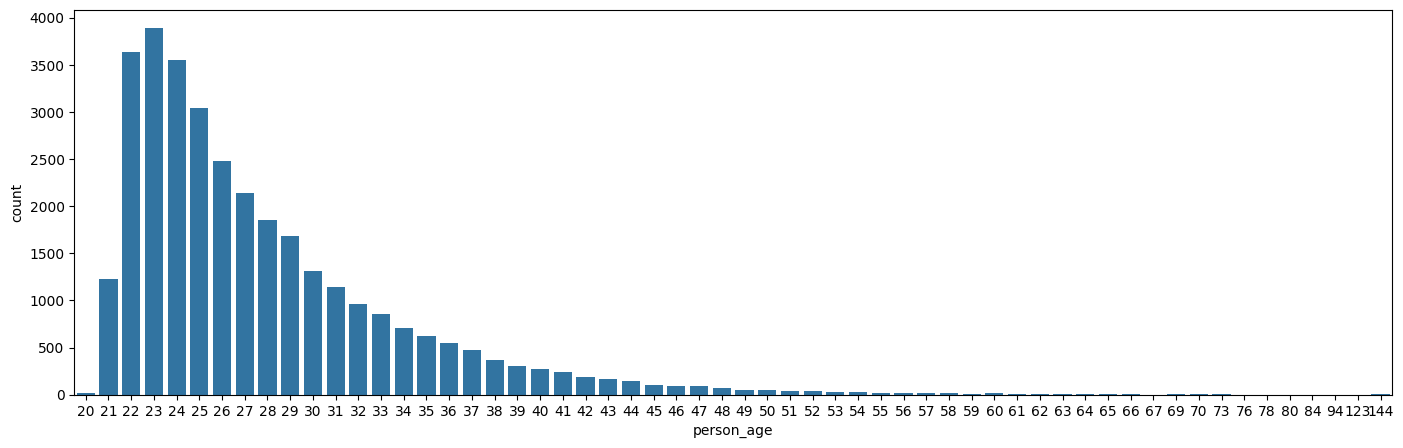

In [ ]:
plt.figure(figsize=(17, 5))
sns.countplot(data=df,x="person_age")
plt.show()

From the above analysis we can see that the most of the loans has been taken at the age of 23,22,24

In [ ]:
df.groupby("loan_intent")["loan_amnt"].mean()


,loan_amnt
loan_intent,
DEBTCONSOLIDATION,9594.886800
EDUCATION,9482.678599
HOMEIMPROVEMENT,10360.520111
MEDICAL,9259.582441
PERSONAL,9573.772867
VENTURE,9583.777758


From the above we can see that the average loan amount for the particular loan intent

In [ ]:
df.groupby("loan_amnt")["loan_int_rate"].mean()

,loan_int_rate
loan_amnt,
500,10.5850
700,12.2900
725,7.3700
750,12.2900
800,7.3700
...,...
33250,13.0600
33950,11.2200
34000,13.2175


In [ ]:
df.groupby("loan_intent")["loan_int_rate"].mean()

,loan_int_rate
loan_intent,
DEBTCONSOLIDATION,10.983268
EDUCATION,10.950261
HOMEIMPROVEMENT,11.201152
MEDICAL,11.060194
PERSONAL,10.998221
VENTURE,10.948275


From the above we can see that the average loan interest rate for the particular loan intent